# Import necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

# Data observation

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Null values handeling

In [6]:
null_cols = train.columns[train.isnull().any()]

train[null_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
#dropping columns with large missing Values

train.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace=True,axis=1)

In [8]:
null_cols = train.columns[train.isnull().any()]

train[null_cols].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [9]:
train.fillna(method = 'ffill',inplace = True)

In [10]:
null_cols = test.columns[test.isnull().any()]

test[null_cols].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [11]:
test.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace=True,axis=1)
test.fillna(method = 'ffill',inplace = True)

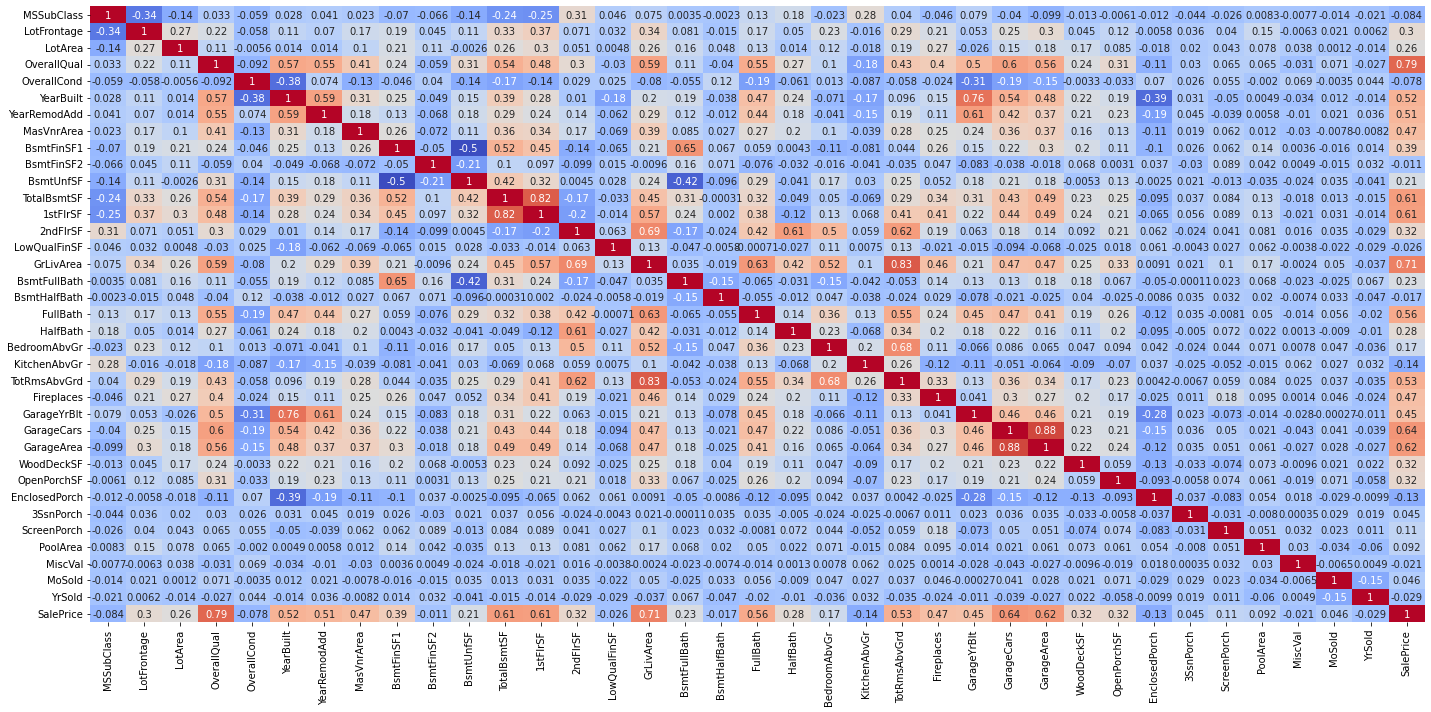

In [12]:
corr = train.corr()

plt.figure(figsize = (20,10))
sns.heatmap(corr,cbar = False, cmap = 'coolwarm', annot = True)
plt.tight_layout()

# Converting Categorical values. and Fixing num values for both Train and Test set.

In [13]:
cat = train.select_dtypes(include = ['object'])
num = train.select_dtypes(include = ['int','float'])

In [14]:
from sklearn. preprocessing import LabelEncoder
la = LabelEncoder()
for i in range(cat.shape[1]):
    cat.iloc[:, i] = la.fit_transform(cat.iloc[:, i])

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
numimp = imputer.fit_transform(num)

In [16]:
from sklearn.impute import KNNImputer
imputer_c = KNNImputer(n_neighbors=2, weights="uniform")
catimp = imputer.fit_transform(cat)

In [17]:
num = pd.DataFrame(numimp , columns= num.columns).reset_index(drop = True)

In [18]:
df = pd.concat([num,cat],axis=1)
df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,4,2,6,1,1,4,4,2,8,4
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,4,3,6,1,1,4,4,2,8,4
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,4,2,6,1,1,4,4,2,8,4
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,4,2,6,5,2,4,4,2,8,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,4,2,6,1,1,4,4,2,8,4


In [19]:
cat_t = test.select_dtypes(include = ['object'])
num_t = test.select_dtypes(include = ['int','float'])

In [20]:
from sklearn.impute import KNNImputer
imputer_tn = KNNImputer(n_neighbors=2, weights="uniform")
t_impn = imputer_tn.fit_transform(num_t)

In [21]:
from sklearn. preprocessing import LabelEncoder
la_t = LabelEncoder()
for i in range(cat_t.shape[1]):
    cat_t.iloc[:, i] = la.fit_transform(cat_t.iloc[:, i])


In [22]:
from sklearn.impute import KNNImputer
imputer_t = KNNImputer(n_neighbors=2, weights="uniform")
t_imp = imputer_t.fit_transform(cat_t)

In [23]:
cat_t.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,3,3,6,1,2,3,4,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,3,2,6,1,2,3,4,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,3,3,6,1,0,3,4,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,3,2,6,1,0,3,4,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,3,2,6,1,1,3,4,2,8,4


In [24]:
num_t = pd.DataFrame(t_impn , columns= num_t.columns).reset_index(drop = True)
cat_t = pd.DataFrame(t_imp , columns= cat_t.columns).reset_index(drop = True)

In [25]:
df_t = pd.concat([num_t,cat_t],axis=1)
df_t.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,3.0,3.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,3.0,2.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,3.0,3.0,6.0,1.0,0.0,3.0,4.0,2.0,8.0,4.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,3.0,2.0,6.0,1.0,0.0,3.0,4.0,2.0,8.0,4.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,3.0,2.0,6.0,1.0,1.0,3.0,4.0,2.0,8.0,4.0


In [26]:
imptest_df_t = imputer.fit_transform(df_t)
test_imp_df_t = pd.DataFrame(imptest_df_t, columns= df_t.columns).reset_index(drop = True)

In [27]:
test_imp_df_t

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,3.0,3.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,3.0,2.0,6.0,1.0,2.0,3.0,4.0,2.0,8.0,4.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,3.0,3.0,6.0,1.0,0.0,3.0,4.0,2.0,8.0,4.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,3.0,2.0,6.0,1.0,0.0,3.0,4.0,2.0,8.0,4.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,3.0,2.0,6.0,1.0,1.0,3.0,4.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,3.0,3.0,6.0,4.0,2.0,3.0,4.0,2.0,8.0,4.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,3.0,3.0,6.0,4.0,2.0,3.0,4.0,2.0,8.0,0.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,3.0,3.0,6.0,5.0,2.0,3.0,4.0,2.0,8.0,0.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,3.0,3.0,6.0,5.0,2.0,3.0,4.0,2.0,8.0,4.0


# Train Test

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(df[['SalePrice']],axis=1)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize = True)
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)

In [30]:
from sklearn import metrics
from sklearn.metrics import r2_score

MSE 1091334471.3597727




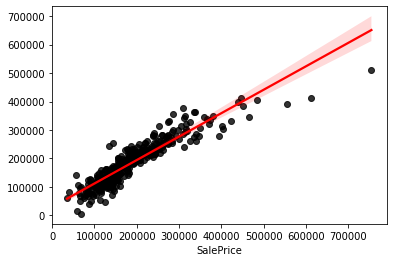

In [31]:
sns.regplot(y_test,prediction_lr,scatter_kws={"color": "black"}, line_kws={"color": "red"})
print('MSE', metrics.mean_squared_error(y_test,prediction_lr))
lr_r2 = r2_score(y_test , prediction_lr)
print("\n")

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)

MSE 1503293844.3333333




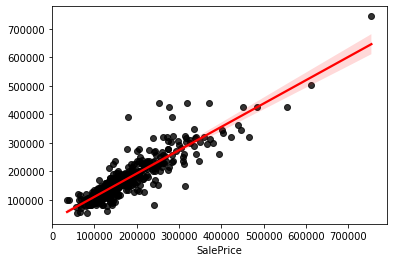

In [33]:
sns.regplot(y_test,pred_dtree,scatter_kws={"color": "black"}, line_kws={"color": "red"})
dtree_r2 = r2_score(y_test ,pred_dtree)
print('MSE', metrics.mean_squared_error(y_test,pred_dtree))
print("\n")

# KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

MSE 2187357823.6274886




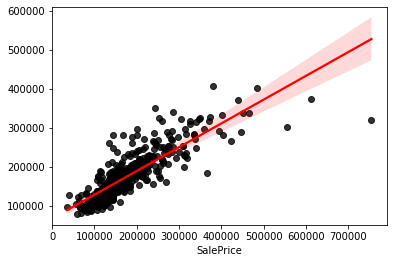

In [35]:
sns.regplot(y_test,knn_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})

print('MSE', metrics.mean_squared_error(y_test,knn_pred))
knn_r2 = r2_score(y_test ,knn_pred)
print("\n")

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)

MSE 776070549.0484774




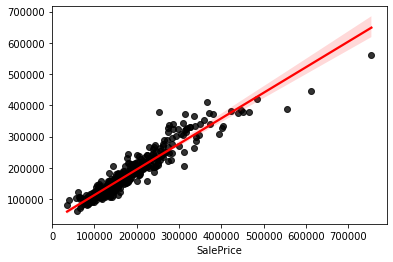

In [37]:
sns.regplot(y_test,pred_rf,scatter_kws={"color": "black"}, line_kws={"color": "red"})
print('MSE', metrics.mean_squared_error(y_test,pred_rf))
rf_r2 = r2_score(y_test ,pred_rf)
print('\n')

# SVM

In [38]:
from sklearn.svm import LinearSVR

sv = LinearSVR()

sv.fit(X_train,y_train)

pred_sv = sv.predict(X_test)

MSE 1453612758.8355775




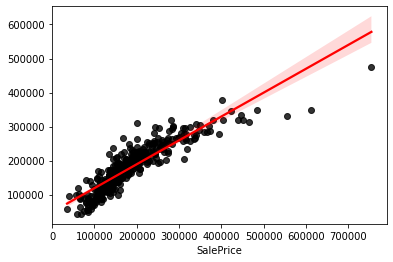

In [39]:
sns.regplot(y_test,pred_sv,scatter_kws={"color": "black"}, line_kws={"color": "red"})

print('MSE', metrics.mean_squared_error(y_test,pred_sv))
sv_r2 = r2_score(y_test ,pred_sv)
print('\n')

# RANSAC

In [40]:
from sklearn.linear_model import RANSACRegressor

rsac = RANSACRegressor()

rsac.fit(X_train,y_train)

pred_rsac = rsac.predict(X_test)

MSE 1453612758.8355775




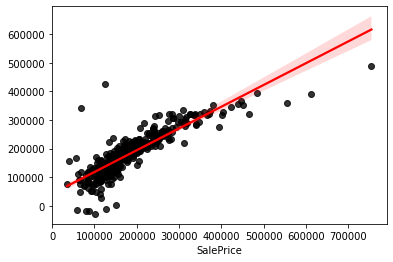

In [41]:
sns.regplot(y_test,pred_rsac,scatter_kws={"color": "black"}, line_kws={"color": "red"})
print('MSE', metrics.mean_squared_error(y_test,pred_sv))
rsac_r2 = r2_score(y_test ,pred_sv)
print('\n')

# XGBoost

In [42]:
from xgboost import XGBRegressor

xg = XGBRegressor()

xg.fit(X_train,y_train)

pred_xg = xg.predict(X_test)

MSE 686499617.7423193




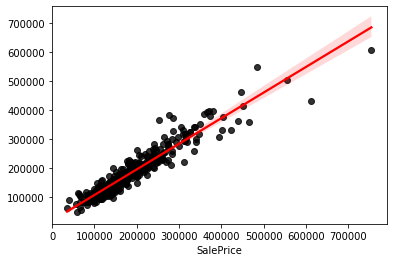

In [43]:
sns.regplot(y_test,pred_xg,scatter_kws={"color": "black"}, line_kws={"color": "red"})
print('MSE', metrics.mean_squared_error(y_test,pred_xg))
xg_r2 = r2_score(y_test ,pred_xg)
print('\n')

# ALL R2 SCORES

In [44]:
print("Linear Regression R2 Score: ",lr_r2)
print("\n")
print("Decision Tree R2 Score: ",dtree_r2)
print("\n")
print("KNN R2 Score: ",knn_r2)
print("\n")
print("Random Forest R2 Score: ",rf_r2)
print("\n")
print("SVM R2 Score: ",sv_r2)
print("\n")
print("RANSAC R2 Score: ",rsac_r2)
print("\n")
print("XGBoost R2 Score: ",xg_r2)

Linear Regression R2 Score:  0.8436056452166572


Decision Tree R2 Score:  0.7845695549767193


KNN R2 Score:  0.6865393474831939


Random Forest R2 Score:  0.8887847346803187


SVM R2 Score:  0.7916891333601241


RANSAC R2 Score:  0.7916891333601241


XGBoost R2 Score:  0.9016207518470043


# TO CSV 

In [45]:
xgb = XGBRegressor()
xgb.fit(X,y)
prediction_xgb = xgb.predict(test_imp_df_t)

In [46]:
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
submission = test[["Id"]]
submission["SalePrice"] = prediction_xgb
submission.to_csv('predictionv.csv', index=False)
submission

,Id,SalePrice
0,1461,133008.312500
1,1462,151529.921875
2,1463,180794.468750
3,1464,191448.828125
4,1465,177537.328125
...,...,...
1454,2915,69962.500000
1455,2916,79213.171875
1456,2917,171823.859375
1457,2918,118945.796875


**Please tell me in comments if any improvement i can do. That will help me a lot ;-)**